<a href="https://colab.research.google.com/github/knayani16/PDSASS1/blob/1/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import pandas as pd

def create_directories(directories):
    for directory in directories:
        if not os.path.exists(directory):
            os.makedirs(directory)

def load_raw_data(file_path):
    return pd.read_csv(file_path)

def clean_data(raw_data):
    cleaned_data = raw_data.copy()
    return cleaned_data

def save_cleaned_data(cleaned_data, output_path):
    cleaned_data.to_csv(output_path, index=False)

if __name__ == "__main__":
    directories = ['data_raw', 'data_cleaned', 'analysis_scripts', 'results', 'report', 'figures', 'code']

    create_directories(directories)

    raw_data_path = 'import os'
import pandas as pd

def create_directories(directories):
    for directory in directories:
        if not os.path.exists(directory):
            os.makedirs(directory)

def load_raw_data(file_path):
    return pd.read_csv(file_path)

def clean_data(raw_data):
    cleaned_data = raw_data.copy()
    return cleaned_data

def save_cleaned_data(cleaned_data, output_path):
    cleaned_data.to_csv(output_path, index=False)

if __name__ == "__main__":
    directories = ['data_raw', 'data_cleaned', 'analysis_scripts', 'results', 'report', 'figures', 'code']

    create_directories(directories)

    raw_data_path = '/content/drive/MyDrive/raw_data.csv'
    raw_data = load_raw_data(raw_data_path)

    cleaned_data = clean_data(raw_data)

    cleaned_data_path = 'data_cleaned/cleaned_data.csv'
    save_cleaned_data(cleaned_data, cleaned_data_path)

    raw_data = load_raw_data(raw_data_path)

    cleaned_data = clean_data(raw_data)

    cleaned_data_path = 'data_cleaned/cleaned_data.csv'
    save_cleaned_data(cleaned_data, cleaned_data_path)


In [15]:
raw_data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [16]:
cleaned_data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


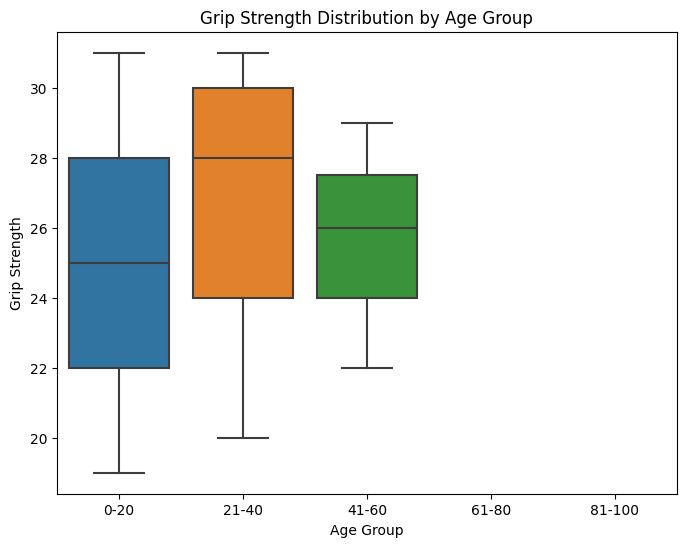

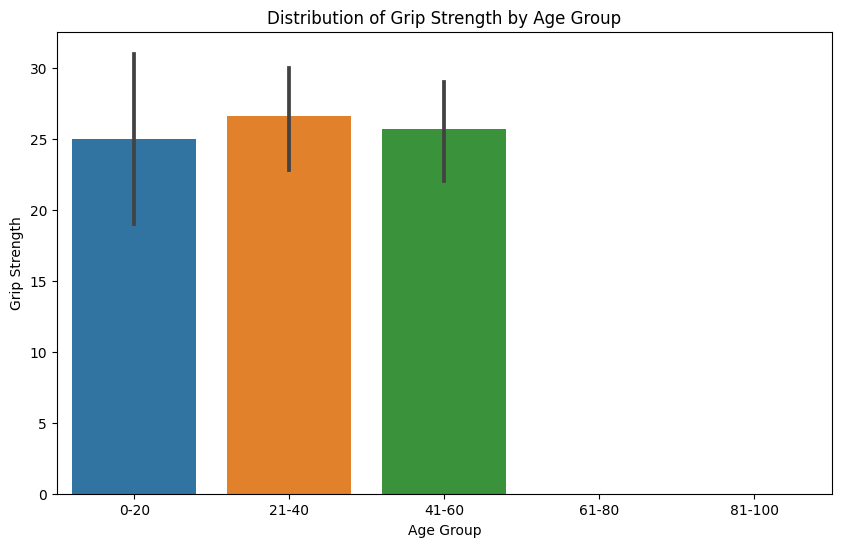

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_data = pd.read_csv('data_cleaned/cleaned_data.csv')

plt.figure(figsize=(8, 6))

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
cleaned_data['Age Group'] = pd.cut(cleaned_data['Age'], bins=age_bins, labels=age_labels, right=False)

sns.boxplot(x='Age Group', y='Grip strength', data=cleaned_data)
plt.title('Grip Strength Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Grip Strength')
plt.savefig('results/grip_strength_age_boxplot.png')


descriptive_stats = cleaned_data.describe()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Grip strength', data=cleaned_data)
plt.title('Distribution of Grip Strength by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Grip Strength')
plt.savefig('results/grip_strength_distribution.png')



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import json

cleaned_data = pd.read_csv('data_cleaned/cleaned_data.csv')

X = cleaned_data[['Age']]
y = cleaned_data['Grip strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predicted_grip_strength = model.predict(X_test)

mse = mean_squared_error(y_test, predicted_grip_strength)
print(f'Mean Squared Error: {mse}')

model_results = {
    'Model': 'Decision Tree Regressor',
    'Mean Squared Error': mse,
}

with open('results/model_results.json', 'w') as model_file:
    json.dump(model_results, model_file)

Mean Squared Error: 45.0
